In [614]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
notebook_dir = os.getcwd()  
project_root = os.path.abspath(os.path.join(notebook_dir, '../'))  
sys.path.append(project_root)

# Import các hàm từ json_handle
from ml.preprocess.utils.json_handle import (
    merge_data_with_paths,
    read_json,
    merge_json_files,
    write_json
)

In [615]:
import pandas as pd

# # READ JSON 
path = "../data/interim/batdongsancomvn/chungcu/interim_merged_chungcu.json"
data = read_json(path)

# Tạo DataFrame từ dữ liệu
df = pd.DataFrame(data)

# Thay thế các giá trị "deal" trong cột 'price' thành None (NaN)
df['price'] = df['price'].apply(lambda x: None if x == "deal" else x)
# Chọn các cột cần thiết
variables = [
    'area', "bedrooms", "toilets", "legal_status", "latitude", "longitude",
    "furniture", "house_direction_x", "house_direction_y",
    "balcony_direction_x", "balcony_direction_y","price"
]

# Lọc DataFrame chỉ với các cột đã chọn
df = df[variables]


In [616]:
# Tính tỷ lệ giá trị NaN cho từng cột
nan_ratios = df.isna().mean()  # Tính tỷ lệ NaN (số NaN / tổng số dòng)

# Chuyển kết quả thành DataFrame để hiển thị đẹp hơn
nan_ratios_df = pd.DataFrame({
    "Feature": nan_ratios.index,
    "NaN Ratio": nan_ratios.values
})

# In ra kết quả
print("Tỷ lệ giá trị NaN của tất cả các thuộc tính:")
print(nan_ratios_df.to_string(index=False))

Tỷ lệ giá trị NaN của tất cả các thuộc tính:
            Feature  NaN Ratio
               area   0.072199
           bedrooms   0.097832
            toilets   0.136484
       legal_status   0.206962
           latitude   0.069389
          longitude   0.069389
          furniture   0.802844
  house_direction_x   0.534580
  house_direction_y   0.534580
balcony_direction_x   0.495126
balcony_direction_y   0.495126
              price   0.226001


In [617]:
#             Feature  NaN Ratio
#                area   0.072199
#            bedrooms   0.097832
#             toilets   0.136484
#        legal_status   0.206962
#            latitude   0.069389
#           longitude   0.069389
#           furniture   0.802844
#   house_direction_x   0.534580
#   house_direction_y   0.534580
# balcony_direction_x   0.495126
# balcony_direction_y   0.495126
#               price   0.226001

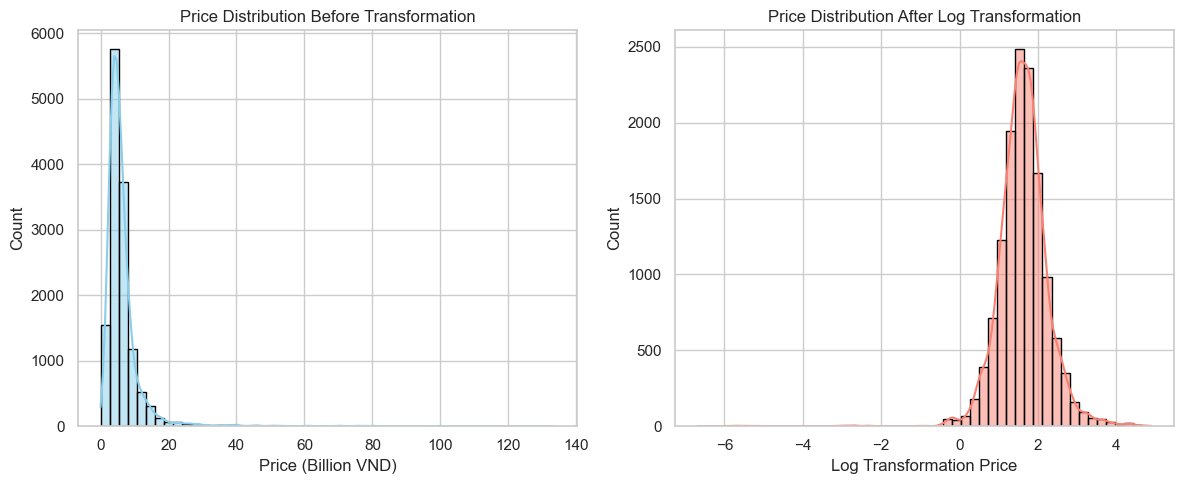

In [618]:
# Chuyển cột 'price' sang kiểu số, các giá trị không phải số sẽ trở thành NaN
data = [entry for entry in data if entry.get("price") != "deal"]

# Tạo DataFrame từ data
df_clean = pd.DataFrame(data)

# Chuyển cột price sang số và loại bỏ NaN
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
df_clean = df_clean.dropna(subset=['price'])  # Loại bỏ NaN
df_clean = df_clean[df_clean['price'] <= 300]


# Loại bỏ giá trị price <= 0 (vì log không xác định cho x <= 0)
df_clean = df_clean[df_clean['price'] > 0]

# Thiết lập phong cách và bảng màu
sns.set(style="whitegrid", palette="muted")

# Biểu đồ trước và sau khi biến đổi logarit
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân phối giá gốc
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], kde=True, color="skyblue", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution Before Transformation')
plt.xlabel('Price (Billion VND)')
plt.ylabel('Count')

# Biểu đồ 2: Phân phối giá logarit
df_clean['log_price'] = np.log(df_clean['price'])  # Logarithm transformation

plt.subplot(1, 2, 2)
sns.histplot(df_clean['log_price'], kde=True, color="salmon", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution After Log Transformation')
plt.xlabel('Log Transformation Price')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

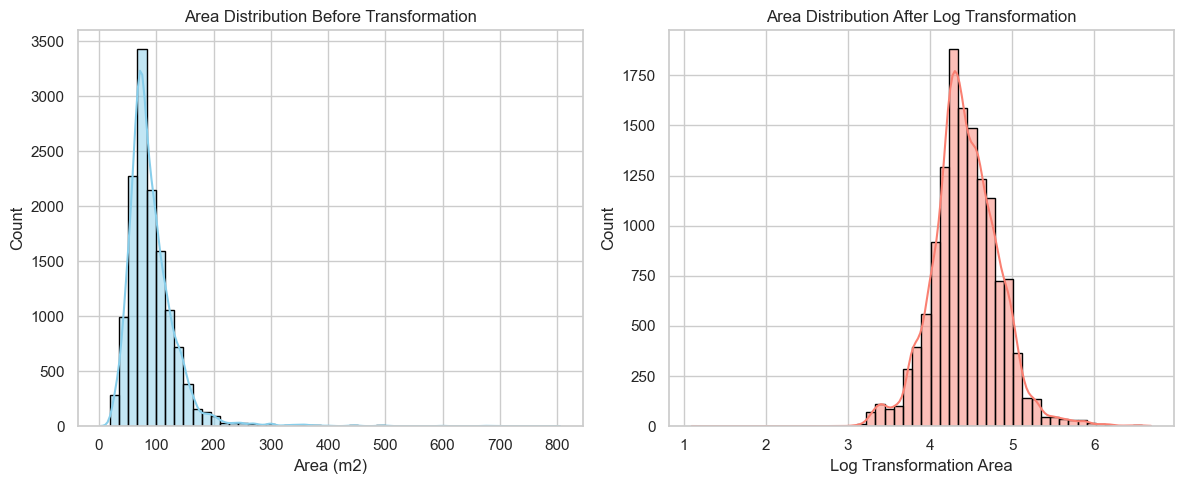

In [619]:
# Chuyển cột 'price' sang kiểu số, các giá trị không phải số sẽ trở thành NaN
data = [entry for entry in data if entry.get("price") != "deal"]

# Tạo DataFrame từ data
df_clean = pd.DataFrame(data)

# Chuyển cột price sang số và loại bỏ NaN
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
df_clean = df_clean.dropna(subset=['price'])  # Loại bỏ NaN
df_clean = df_clean[df_clean['price'] <= 300]


# Loại bỏ giá trị price <= 0 (vì log không xác định cho x <= 0)
df_clean = df_clean[df_clean['price'] > 0]

# Thiết lập phong cách và bảng màu
sns.set(style="whitegrid", palette="muted")

# Biểu đồ trước và sau khi biến đổi logarit
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân phối giá gốc
plt.subplot(1, 2, 1)
sns.histplot(df_clean['area'], kde=True, color="skyblue", bins=50, edgecolor="black", linewidth=1)
plt.title('Area Distribution Before Transformation')
plt.xlabel('Area (m2)')
plt.ylabel('Count')

# Biểu đồ 2: Phân phối giá logarit
df_clean['log_area'] = np.log(df_clean['area'])  # Logarithm transformation

plt.subplot(1, 2, 2)
sns.histplot(df_clean['log_area'], kde=True, color="salmon", bins=50, edgecolor="black", linewidth=1)
plt.title('Area Distribution After Log Transformation')
plt.xlabel('Log Transformation Area')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

In [620]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
notebook_dir = os.getcwd()  
project_root = os.path.abspath(os.path.join(notebook_dir, '../'))  
sys.path.append(project_root)

# Import các hàm từ json_handle
from ml.preprocess.utils.json_handle import (
    merge_data_with_paths,
    read_json,
    merge_json_files,
    write_json
)

In [621]:


# # READ JSON 
path = "../data/interim/batdongsancomvn/chungcu/interim_merged_chungcu.json"
data = read_json(path)
data = [entry for entry in data if entry.get("price") != "deal"]
df = pd.DataFrame(data)
df = df.query("price != 'deal'")
# print(df['furniture'])

# key_frequency = {}
# for item in data:
#     for key in item.keys():
#         key_frequency[key] = key_frequency.get(key, 0) + 1
# print("Tần suất xuất hiện của các key trong data:")
# # for key, frequency in key_frequency.items():
# #     print(f"{key}: {frequency}")


# variables = [
#     'area', "bedrooms", "toilets", "legal_status", "latitude", "longitude",
#     "furniture", "house_direction_x", "house_direction_y",
#     "balcony_direction_x", "balcony_direction_y"
# ]
# # Tính tỷ lệ NaN cho từng key trong variables
# key_nan_ratio = {}
# total_values = len(data)  # Tổng số mẫu trong data
# for key in variables:  # Chỉ xét các key nằm trong 'variables'
#     nan_count = sum(1 for item in data if key not in item or item[key] is None)
#     key_nan_ratio[key] = nan_count / total_values  # Tính tỷ lệ NaN

# # Chuyển kết quả thành DataFrame
# df_nan_ratio = pd.DataFrame({
#     "Số Thứ Tự": range(1, len(key_nan_ratio) + 1),
#     "Tên Thuộc Tính": list(key_nan_ratio.keys()),
#     "Tỷ Lệ NaN": list(key_nan_ratio.values())
# })
# # 
# # Hiển thị kết quả
# print("Bảng Tỷ Lệ NaN cho Các Thuộc Tính (Chỉ các key trong variables):")
# print(df_nan_ratio.to_string(index=False))

In [622]:
          #                area   0.085259

          #            bedrooms   0.108980

          #             toilets   0.143409

          #        legal_status   0.272992

          #            latitude   0.082006

          #           longitude   0.082006

          #           furniture   0.867774

          #   house_direction_x   0.538258

          #   house_direction_y   0.538258

          # balcony_direction_x   0.500644

          # balcony_direction_y   0.500644

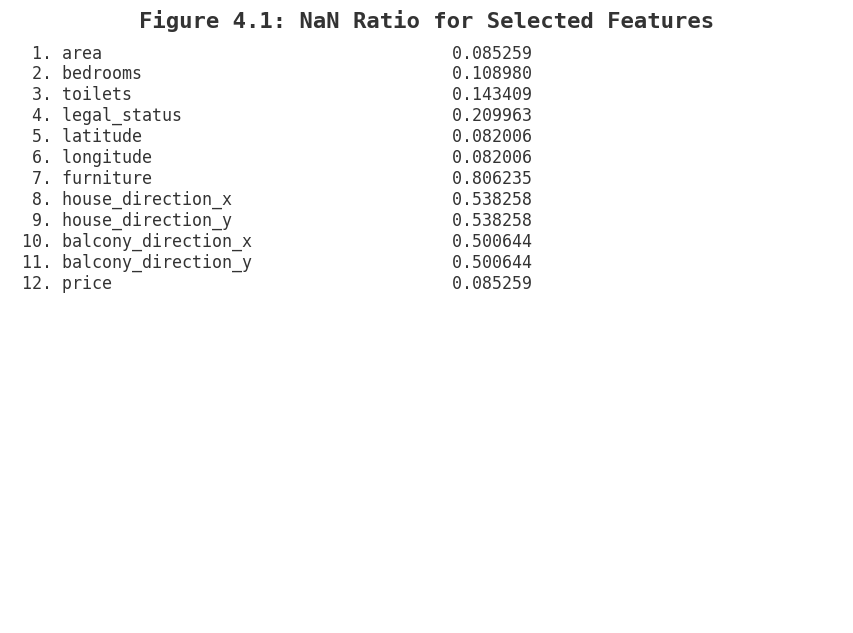

In [623]:
import pandas as pd
import matplotlib.pyplot as plt

# Chọn các cột cần thiết
variables = [
    'area', "bedrooms", "toilets", "legal_status", "latitude", "longitude",
    "furniture", "house_direction_x", "house_direction_y",
    "balcony_direction_x", "balcony_direction_y","price"
]

# Lọc DataFrame chỉ với các cột đã chọn
df = df[variables]

# Tính tỷ lệ NaN cho từng cột và đưa vào DataFrame
nan_ratio = df.isna().mean().reset_index()
nan_ratio.columns = ['Feature', 'NaN Ratio']

# Thiết lập phông chữ monospace cho matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans Mono'

# Tạo figure và tắt trục
fig, ax = plt.subplots(figsize=(9, len(nan_ratio) * 0.4 + 2))
ax.axis('off')

# Tạo nội dung bảng theo từng dòng
rows = []
for idx, (feature, value) in enumerate(zip(nan_ratio['Feature'], nan_ratio['NaN Ratio'])):
    feature_str = f"{idx+1:>2}. {feature}"   # Đánh số và căn trái
    value_str = f"{value:.6f}"              # Làm tròn đến 6 chữ số thập phân
    rows.append((feature_str, value_str))

# Ghép các dòng lại thành văn bản bảng
table_text = "\n".join([f"{row[0]:<40} {row[1]:>10}" for row in rows])

# Hiển thị bảng dưới dạng văn bản trên figure
fig.text(
    0.05, 0.9, table_text,
    fontsize=12, va='top',
    family='monospace', color='#333333'
)

# Thêm tiêu đề cho hình ảnh
plt.title(
    "Figure 4.1: NaN Ratio for Selected Features",
    fontsize=16, pad=20,
    color="#333333", weight='bold',
    loc='center'
)

# Hiển thị hình ảnh
plt.tight_layout(pad=2)
plt.show()

Phát Hiện và Xử Lý Giá Trị Ngoại Lai Sử dụng  Z-Score:

In [624]:
from scipy import stats

# Tính z-score cho các biến
z_scores = np.abs(stats.zscore(df[['area']]))

# Ngưỡng z-score để xác định ngoại lai (thường là 3)
threshold = 3
outliers = (z_scores > threshold).any(axis=1)

print(f"Số lượng ngoại lai: {outliers.sum()}")

# Loại bỏ các ngoại lai
df_clean = df[~outliers]

print(f"Dữ liệu sau khi loại bỏ ngoại lai: {df_clean.shape}")

Số lượng ngoại lai: 0
Dữ liệu sau khi loại bỏ ngoại lai: (14755, 12)


Trực Quan Hóa Phân Phối của Các Biến


Số lượng giá trị NaN sau khi chuyển đổi:
area                    1258
bedrooms                1608
toilets                 2116
legal_status            3098
latitude                1210
longitude               1210
furniture              11896
house_direction_x       7942
house_direction_y       7942
balcony_direction_x     7387
balcony_direction_y     7387
dtype: int64


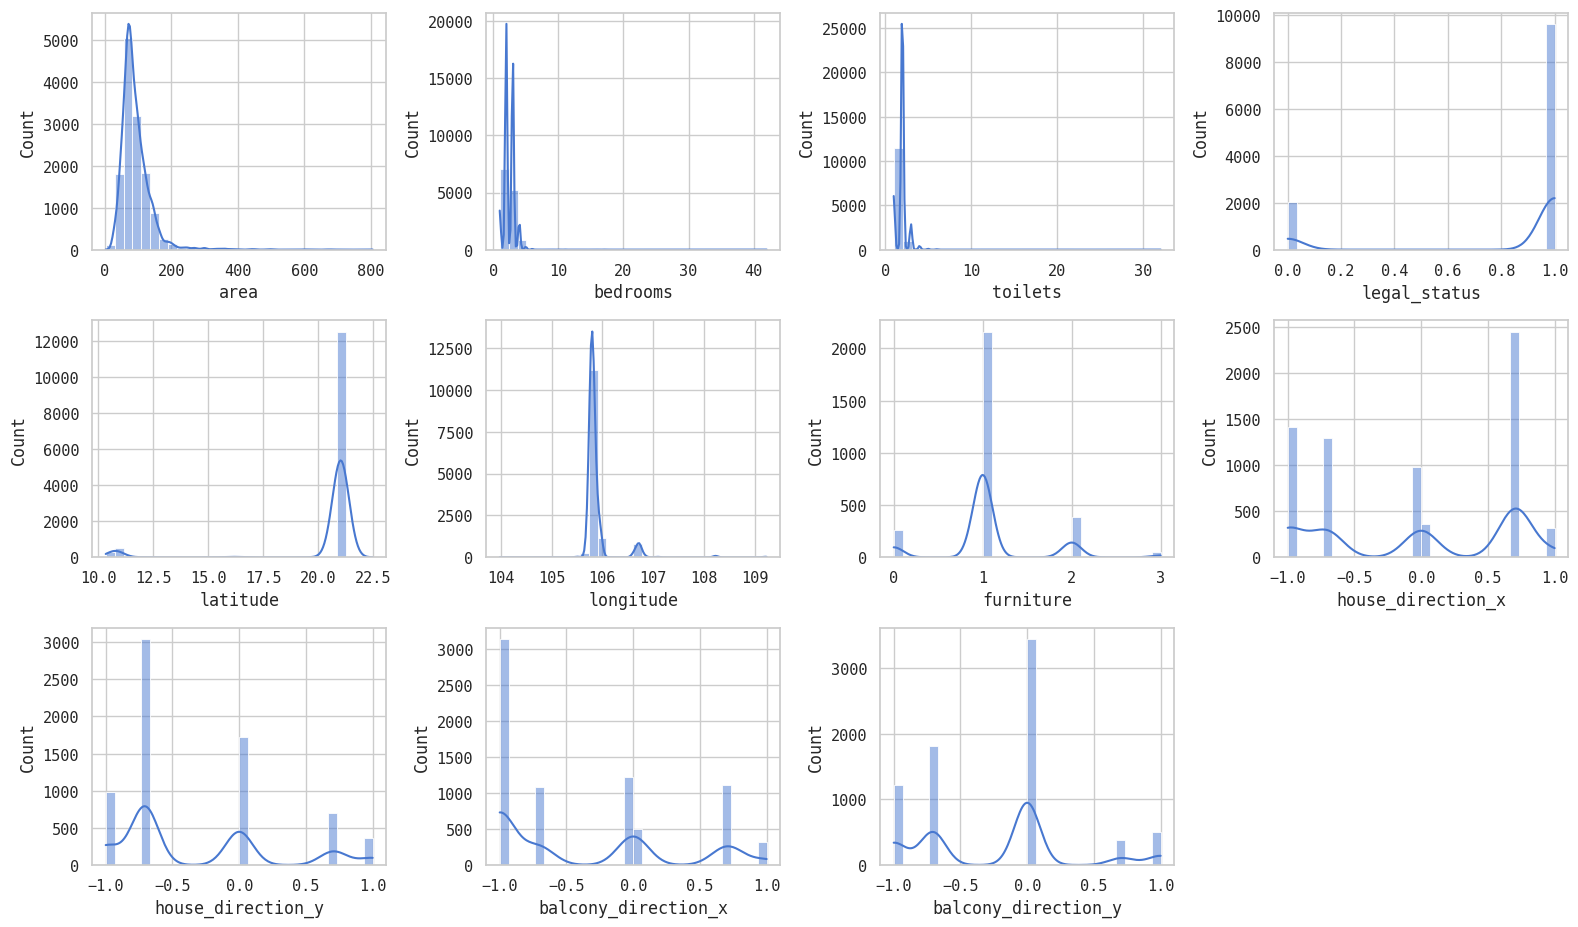

In [625]:
# Vẽ histogram và KDE cho các biến
variables = ['area', "bedrooms", "toilets", "legal_status", "latitude", "longitude", "furniture", "house_direction_x", "house_direction_y",
        "balcony_direction_x", "balcony_direction_y"]
for var in variables:
    non_numeric = df_clean[~df_clean[var].apply(lambda x: isinstance(x, (int, float)))][var]
    if not non_numeric.empty:
        print(f"\nGiá trị không phải số trong cột '{var}':")
        print(non_numeric.unique())

# Chuyển đổi các cột thành số, các giá trị không thể chuyển đổi thành NaN
for var in variables:
    df_clean[var] = pd.to_numeric(df_clean[var], errors='coerce')

# Kiểm tra số lượng NaN sau khi chuyển đổi
print("\nSố lượng giá trị NaN sau khi chuyển đổi:")
print(df_clean[variables].isnull().sum())

# Cách 1: Loại bỏ các dòng chứa NaN
# df_clean = df_clean.dropna(subset=variables)

# # Cách 2: Thay thế NaN bằng giá trị trung bình
# for var in variables:
#     mean_value = df_clean[var].mean()
#     df_clean[var].fillna(mean_value, inplace=True)

# print("\nSố lượng giá trị NaN sau khi xử lý:")
# print(df_clean[variables].isnull().sum())

# # Kiểm tra kiểu dữ liệu sau khi làm sạch
# print("\nKiểu dữ liệu sau khi làm sạch:")
# print(df_clean.dtypes)

# # Vẽ histogram và KDE cho các biến đã làm sạch
plt.figure(figsize=(16, 12))
for i, var in enumerate(variables, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df_clean[var], kde=True, bins=30)
    # plt.title(f'Phân Phối của {var}')
plt.tight_layout()
plt.show()

Tính Hệ Số Tương Quan và Vẽ Ma Trận Tương Quan: 

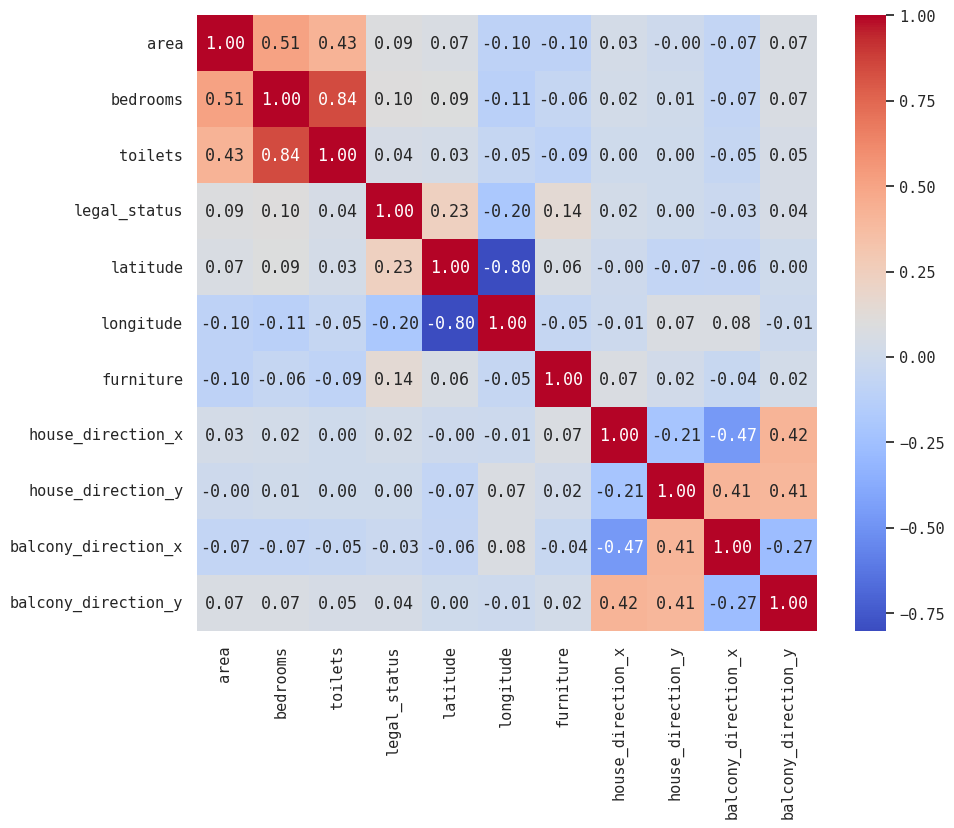

In [626]:
# Tính ma trận tương quan
correlation_matrix = df_clean[['area', "bedrooms", "toilets", "legal_status", "latitude", "longitude", "furniture", "house_direction_x", "house_direction_y",
        "balcony_direction_x", "balcony_direction_y"]].corr()

# Vẽ heatmap của ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
# plt.title('Ma Trận Tương Quan giữa các Biến')
plt.show()



Categorical Features’s BoxPlot

/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3166513843.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))


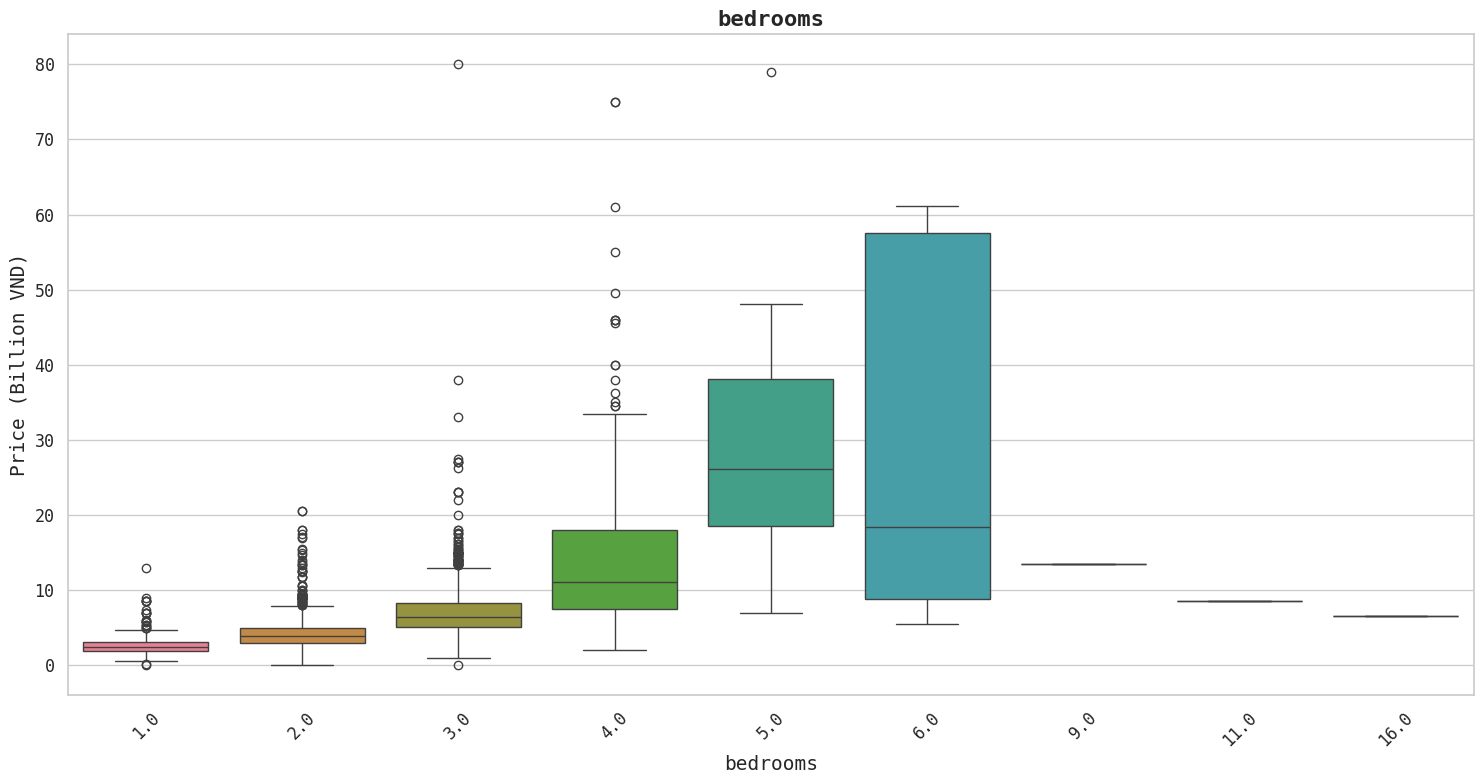

/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3166513843.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))


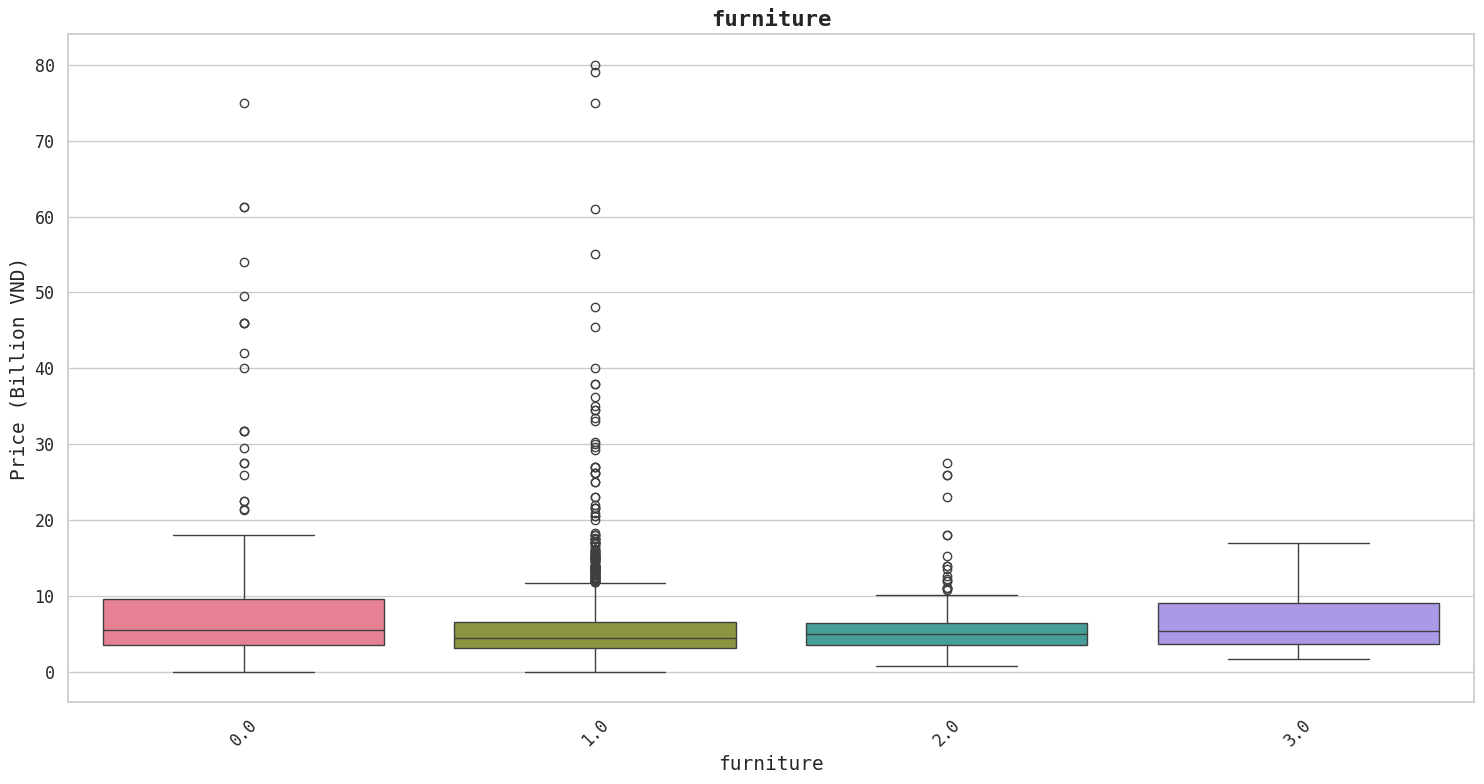

/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3166513843.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))


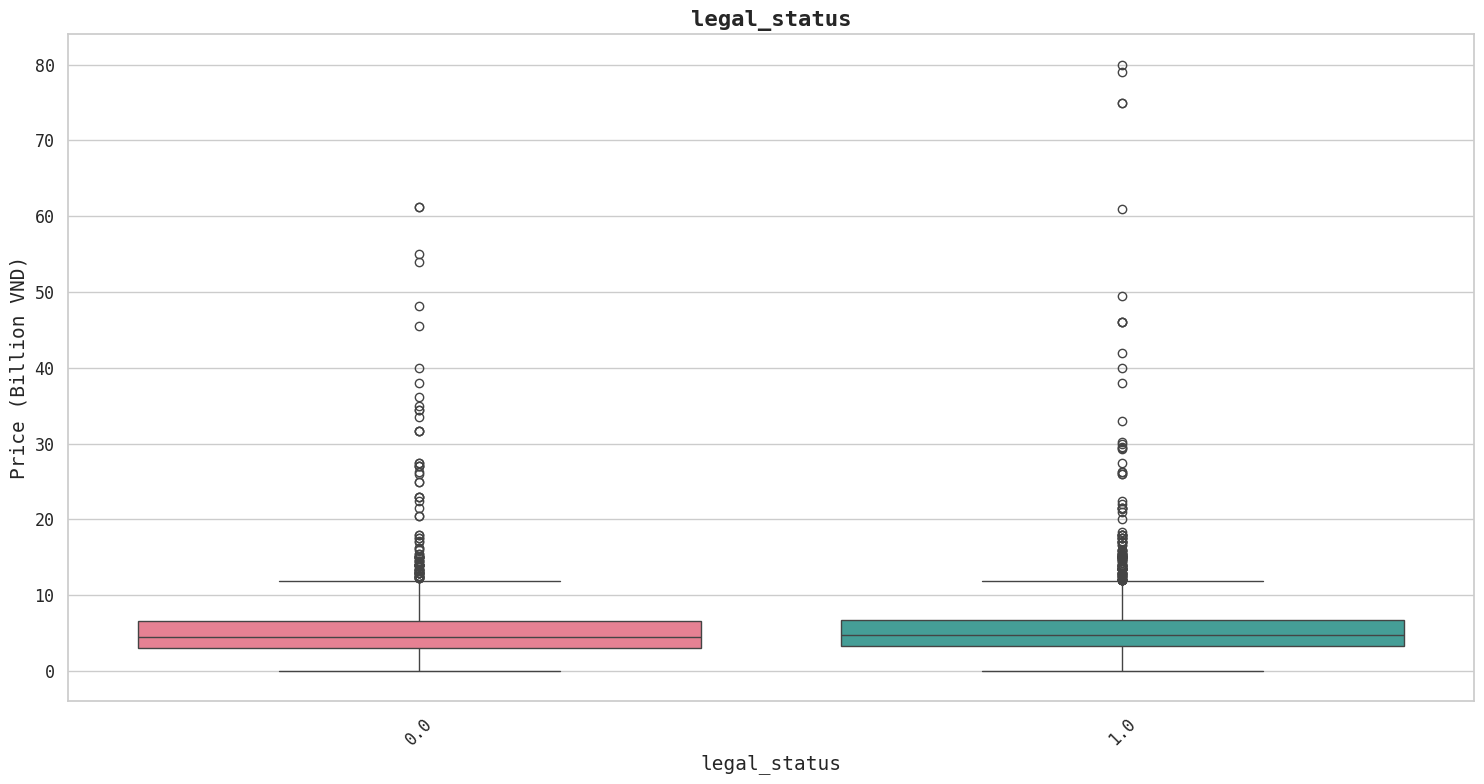

In [627]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Chuyển 'price' về kiểu số, loại bỏ các giá trị không hợp lệ
df_clean['price'] = pd.to_numeric(df['price'], errors='coerce')
# 2. Lọc các hàng có giá trị price <= 200
df_clean = df_clean[df_clean['price'] <= 200]

# 3. Loại bỏ các hàng có giá trị NaN trong 'price' và các cột phân loại
categorical_features = ['bedrooms', 'furniture', 'legal_status']
df_clean = df_clean.dropna(subset=['price'] + categorical_features)

# 4. Loại bỏ các hàng có giá trị không hợp lệ trong cột phân loại
for cat_feature in categorical_features:
    df_clean = df_clean[df_clean[cat_feature] != 'deal']  # Loại bỏ giá trị không mong muốn như 'deal'

# 5. Vẽ BoxPlot cho từng cột phân loại
for cat_feature in categorical_features:
    plt.figure(figsize=(15, 8))
    
    # Vẽ BoxPlot với bảng màu sinh động
    sns.boxplot(x=cat_feature, y='price', data=df_clean, palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))
    
    # Thêm tiêu đề và nhãn
    plt.title(f'{cat_feature}', fontsize=16, fontweight='bold')
    plt.xlabel(cat_feature, fontsize=14)
    plt.ylabel('Price (Billion VND)', fontsize=14)
    
    # Xoay nhãn trục x
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()

/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3211924325.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, ax=axes[i],
/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3211924325.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, ax=axes[i],
/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3211924325.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, ax=axes[i],


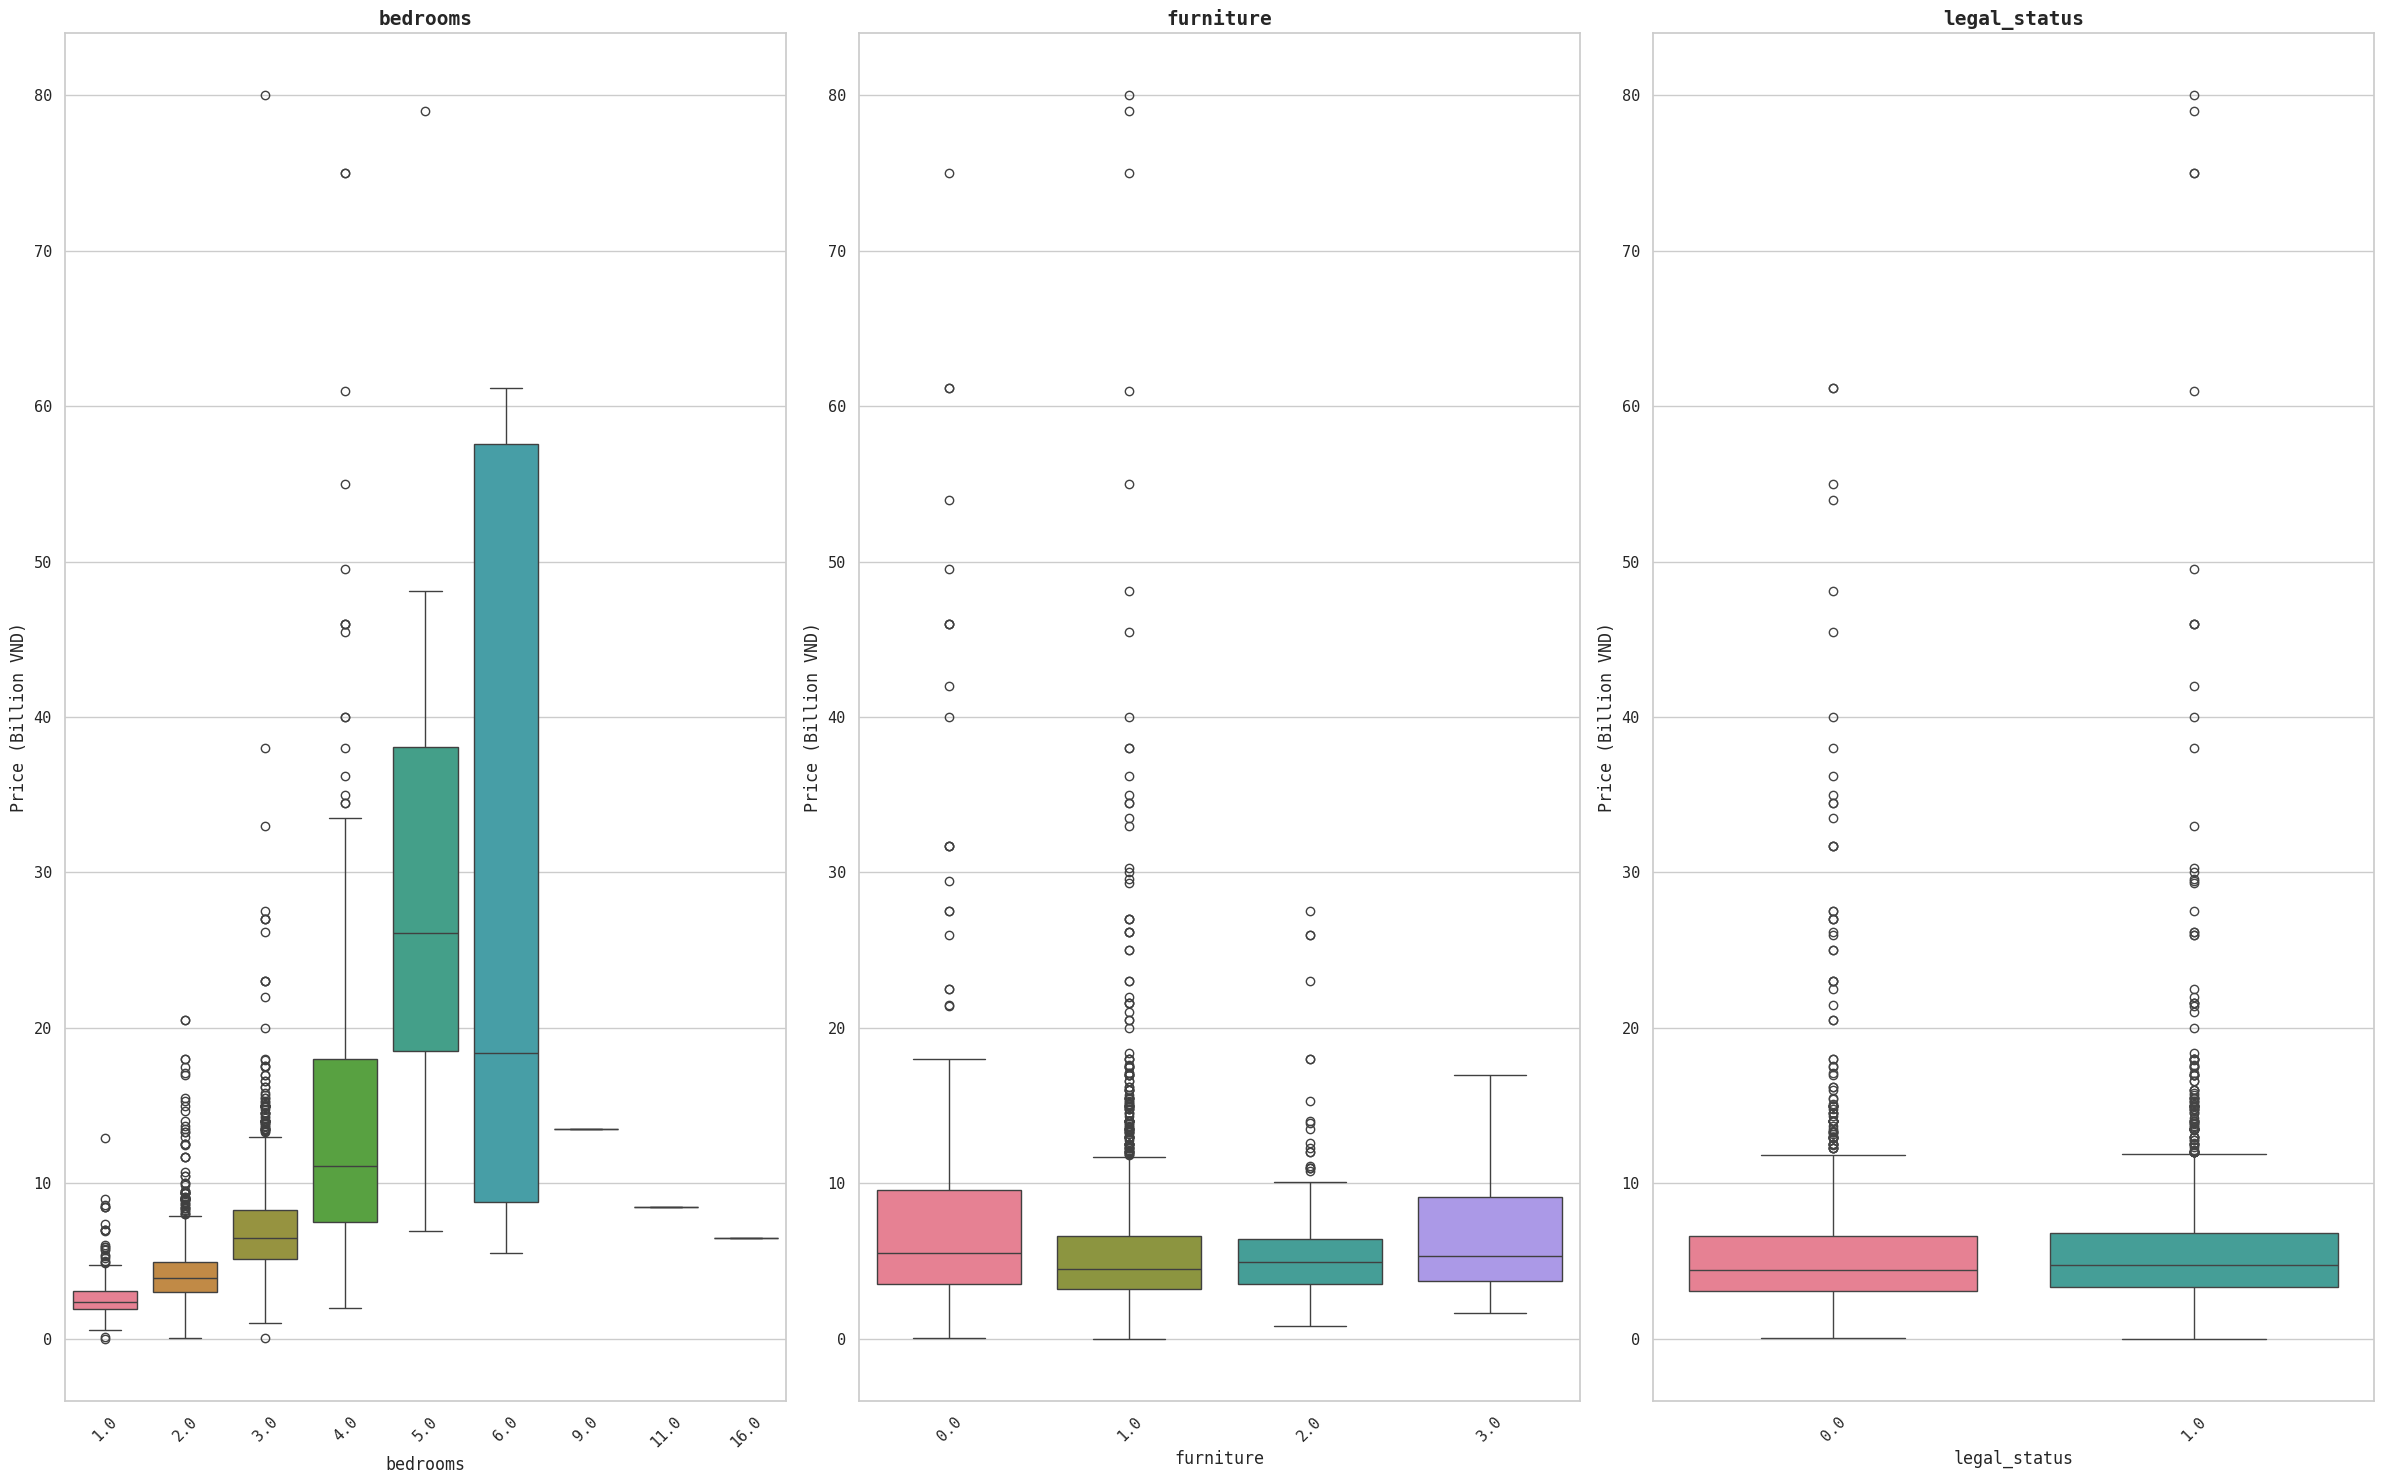

In [628]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Chuyển 'price' về kiểu số, loại bỏ các giá trị không hợp lệ
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')

# 2. Lọc các hàng có giá trị price <= 200
df_clean = df_clean[df_clean['price'] <= 300]

# 3. Loại bỏ các hàng có giá trị NaN trong 'price' và các cột phân loại
categorical_features = ['bedrooms', 'furniture', 'legal_status']
df_clean = df_clean.dropna(subset=['price'] + categorical_features)

# 4. Loại bỏ các hàng có giá trị không hợp lệ trong cột phân loại
for cat_feature in categorical_features:
    df_clean = df_clean[df_clean[cat_feature] != 'deal']

# 5. Vẽ BoxPlot cho từng cột phân loại trên cùng một ảnh
n_features = len(categorical_features)
fig, axes = plt.subplots(nrows=1, ncols=n_features, figsize=(8 * n_features, 15))  # Lưới 1 hàng, n_features cột

# Lặp qua từng cột phân loại và vẽ BoxPlot trên từng trục
for i, cat_feature in enumerate(categorical_features):
    sns.boxplot(x=cat_feature, y='price', data=df_clean, ax=axes[i],
                palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))
    axes[i].set_title(f'{cat_feature}', fontsize=14, fontweight='bold')
    axes[i].set_xlabel(cat_feature, fontsize=12)
    axes[i].set_ylabel('Price (Billion VND)', fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)  # Xoay nhãn trục x

# Tự động căn chỉnh khoảng cách
plt.tight_layout()
plt.show()

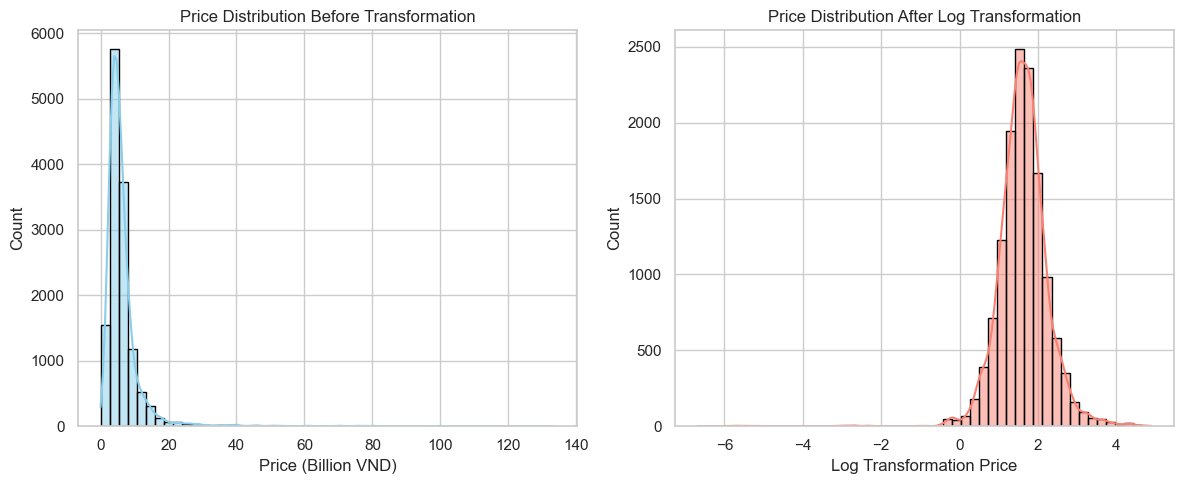

In [629]:
# Chuyển cột 'price' sang kiểu số, các giá trị không phải số sẽ trở thành NaN
data = [entry for entry in data if entry.get("price") != "deal"]

# Tạo DataFrame từ data
df_clean = pd.DataFrame(data)

# Chuyển cột price sang số và loại bỏ NaN
df_clean['price'] = pd.to_numeric(df_clean['price'], errors='coerce')
df_clean = df_clean.dropna(subset=['price'])  # Loại bỏ NaN
df_clean = df_clean[df_clean['price'] <= 300]


# Loại bỏ giá trị price <= 0 (vì log không xác định cho x <= 0)
df_clean = df_clean[df_clean['price'] > 0]

# Thiết lập phong cách và bảng màu
sns.set(style="whitegrid", palette="muted")

# Biểu đồ trước và sau khi biến đổi logarit
plt.figure(figsize=(12, 5))

# Biểu đồ 1: Phân phối giá gốc
plt.subplot(1, 2, 1)
sns.histplot(df_clean['price'], kde=True, color="skyblue", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution Before Transformation')
plt.xlabel('Price (Billion VND)')
plt.ylabel('Count')

# Biểu đồ 2: Phân phối giá logarit
df_clean['log_price'] = np.log(df_clean['price'])  # Logarithm transformation

plt.subplot(1, 2, 2)
sns.histplot(df_clean['log_price'], kde=True, color="salmon", bins=50, edgecolor="black", linewidth=1)
plt.title('Price Distribution After Log Transformation')
plt.xlabel('Log Transformation Price')
plt.ylabel('Count')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3166513843.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))


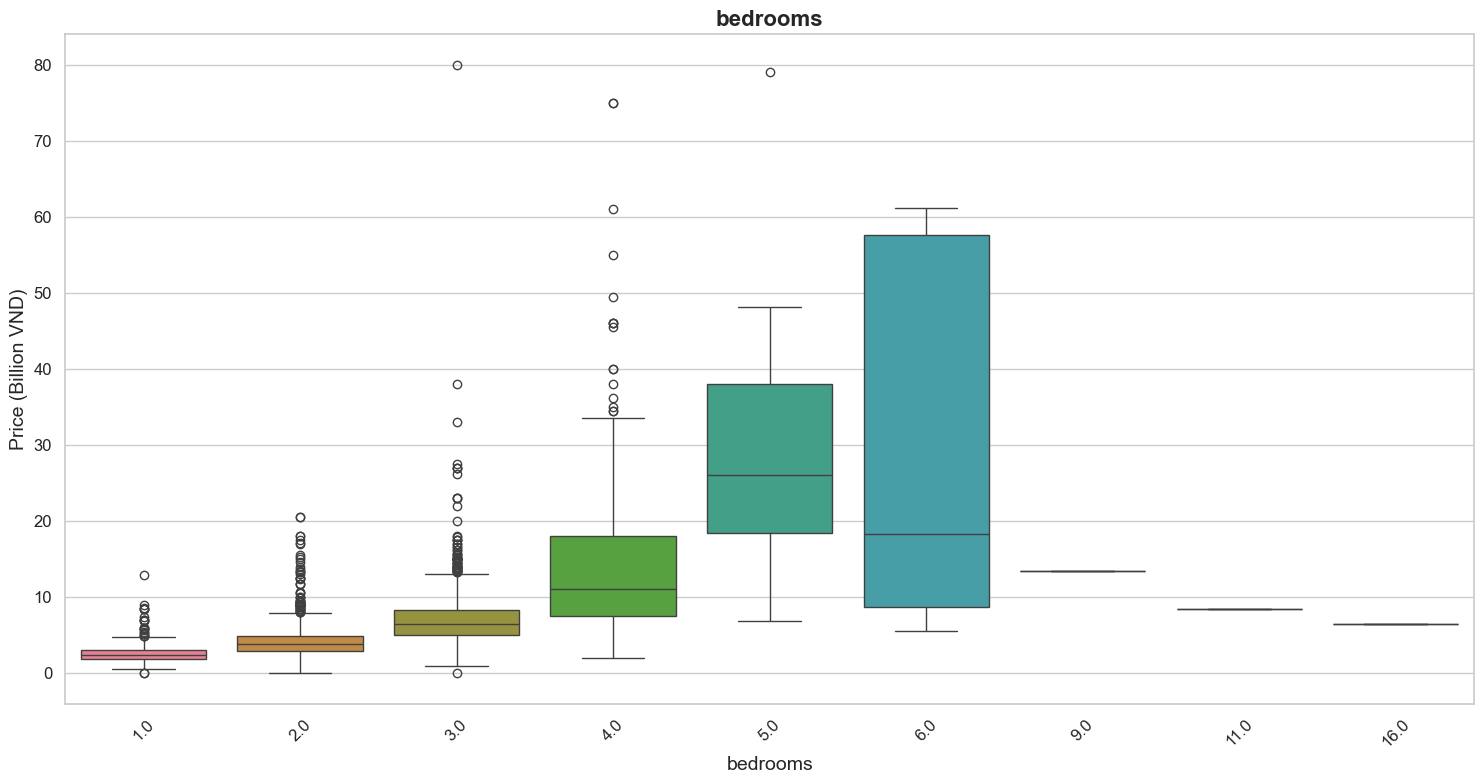

/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3166513843.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))


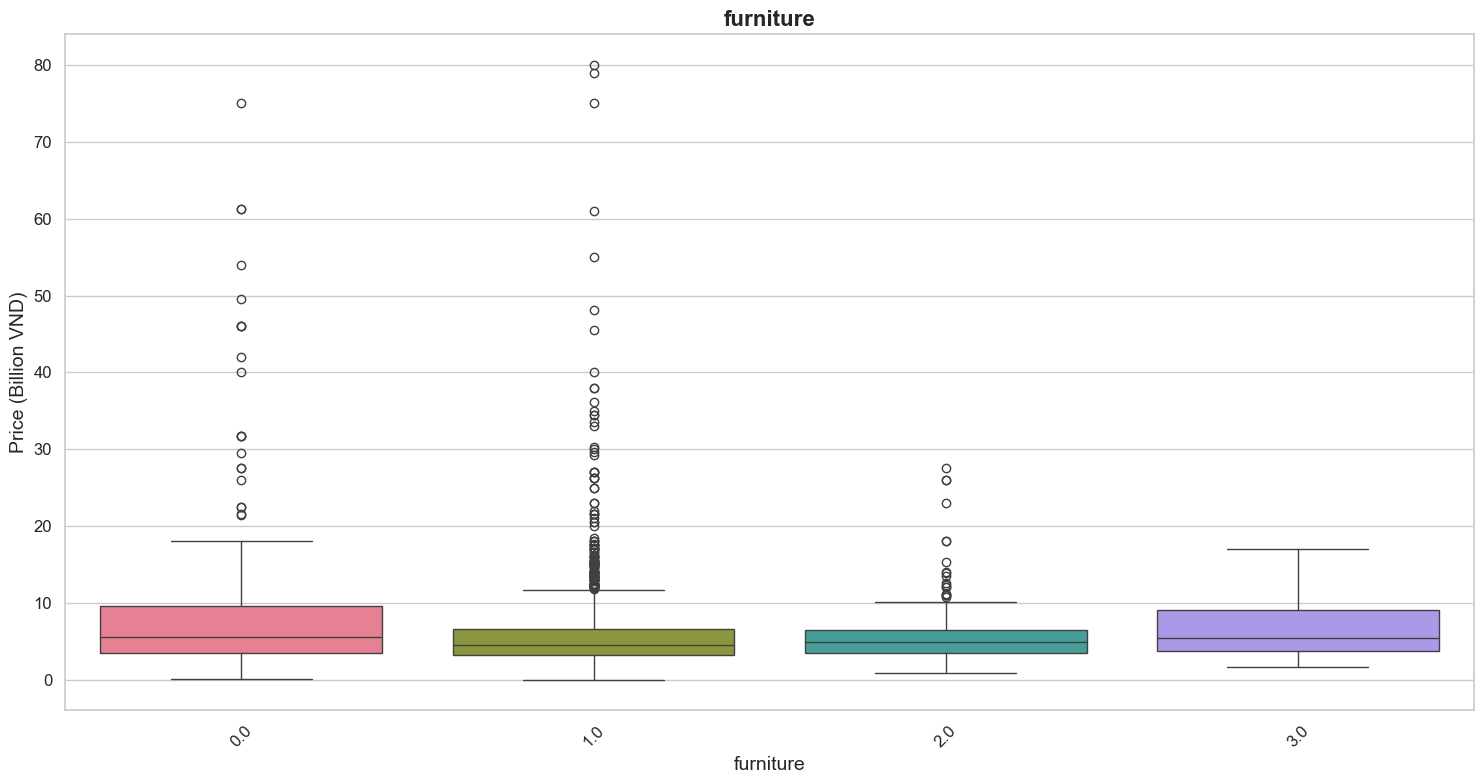

/var/folders/w5/txck4bg523d_v2l_9zf_wrzw0000gn/T/ipykernel_69404/3166513843.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cat_feature, y='price', data=df_clean, palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))


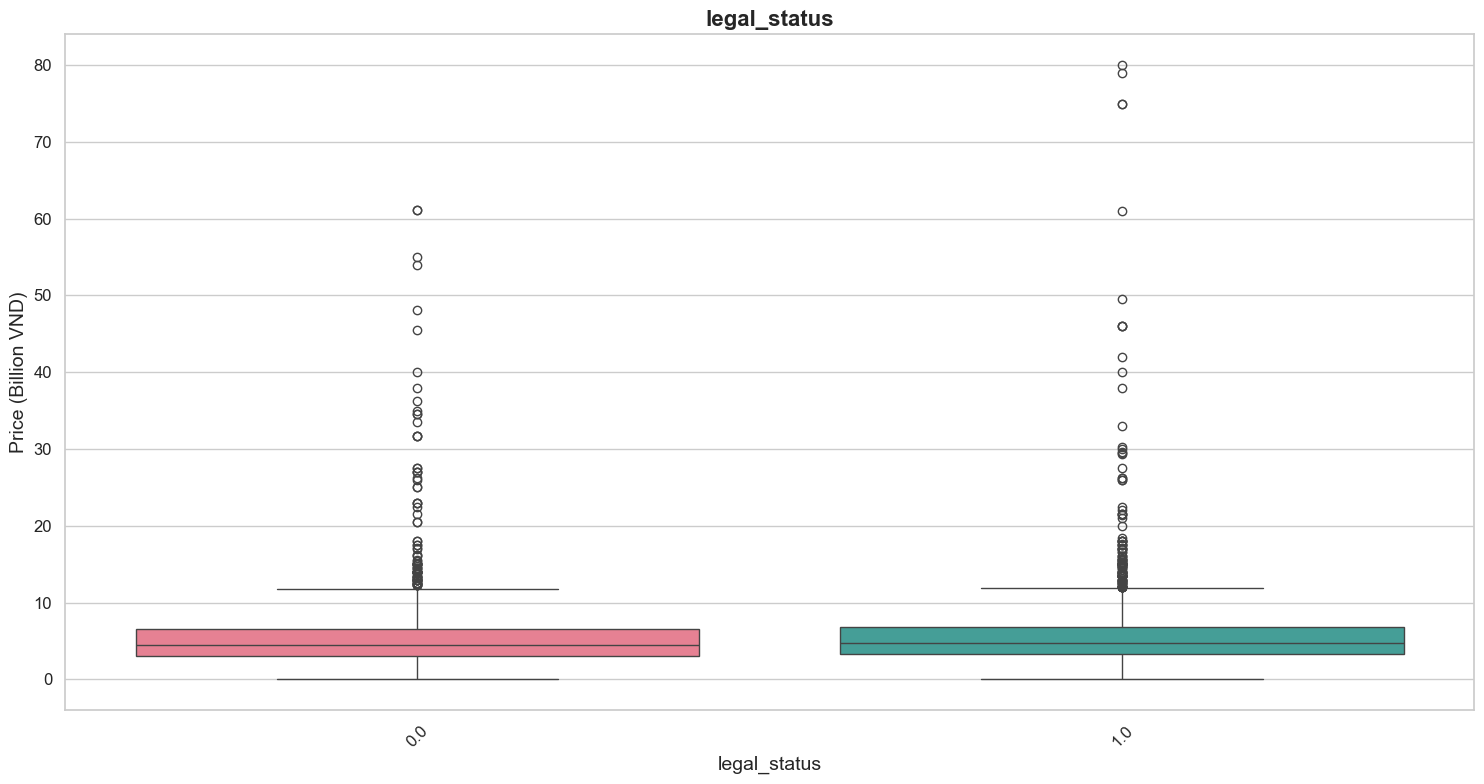

In [630]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Chuyển 'price' về kiểu số, loại bỏ các giá trị không hợp lệ
df_clean['price'] = pd.to_numeric(df['price'], errors='coerce')
# 2. Lọc các hàng có giá trị price <= 200
df_clean = df_clean[df_clean['price'] <= 200]

# 3. Loại bỏ các hàng có giá trị NaN trong 'price' và các cột phân loại
categorical_features = ['bedrooms', 'furniture', 'legal_status']
df_clean = df_clean.dropna(subset=['price'] + categorical_features)

# 4. Loại bỏ các hàng có giá trị không hợp lệ trong cột phân loại
for cat_feature in categorical_features:
    df_clean = df_clean[df_clean[cat_feature] != 'deal']  # Loại bỏ giá trị không mong muốn như 'deal'

# 5. Vẽ BoxPlot cho từng cột phân loại
for cat_feature in categorical_features:
    plt.figure(figsize=(15, 8))
    
    # Vẽ BoxPlot với bảng màu sinh động
    sns.boxplot(x=cat_feature, y='price', data=df_clean, palette=sns.color_palette("husl", len(df_clean[cat_feature].unique())))
    
    # Thêm tiêu đề và nhãn
    plt.title(f'{cat_feature}', fontsize=16, fontweight='bold')
    plt.xlabel(cat_feature, fontsize=14)
    plt.ylabel('Price (Billion VND)', fontsize=14)
    
    # Xoay nhãn trục x
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    
    # Hiển thị biểu đồ
    plt.tight_layout()
    plt.show()